In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\zuhai\anaconda3\envs\AI\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
df=pd.read_csv('wine_data.csv',header=None,usecols=[0,1,2])
df.columns=['Class','Alcohol','Malic Acid']

In [3]:
df.sample(10)

,Class,Alcohol,Malic Acid
3,1,14.37,1.95
149,3,13.08,3.90
77,2,11.84,2.89
34,1,13.51,1.80
50,1,13.05,1.73
87,2,11.65,1.67
133,3,12.70,3.55
107,2,12.72,1.75
125,2,12.07,2.16
123,2,13.05,5.80


<AxesSubplot: xlabel='Alcohol', ylabel='Density'>

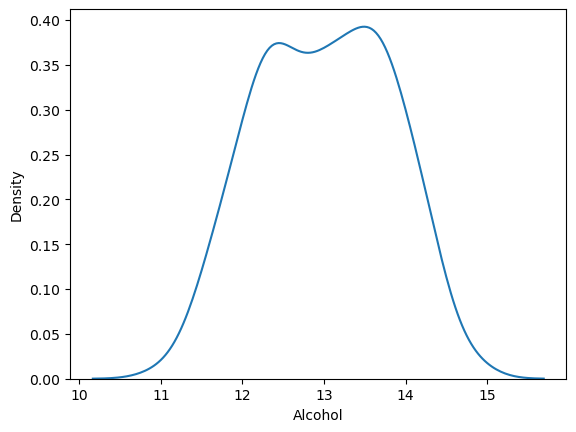

In [4]:
sns.kdeplot(df['Alcohol'])

<AxesSubplot: xlabel='Alcohol', ylabel='Malic Acid'>

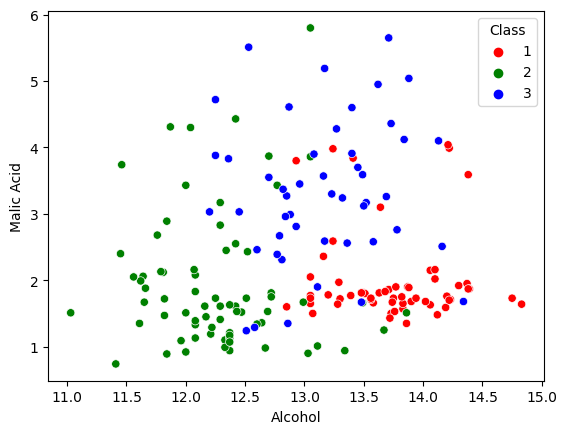

In [5]:
color_dict={1:'red',2:'green',3:'blue'}
sns.scatterplot(x=df['Alcohol'],y=df['Malic Acid'],hue=df['Class'],palette=color_dict)

# train_test_split

In [6]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(df.drop(['Class'],axis=1),
                                               df['Class'],test_size=0.3,random_state=0)
X_train.shape,X_test.shape

((124, 2), (54, 2))

# MinMaxNormalization

In [7]:
from sklearn.preprocessing import MinMaxScaler
scalar= MinMaxScaler()
#fitting our scalar object to X_train
scalar.fit(X_train)
#Applying MinMax normalization
X_train_scaled=scalar.transform(X_train)
X_test_scaled=scalar.transform(X_test)

In [8]:
X_train_scaled=pd.DataFrame(X_train_scaled).rename(columns={0:'Alcohol',1:'Malic Acid'})
X_test_scaled=pd.DataFrame(X_test_scaled).rename(columns={0:'Alcohol',1:'Malic Acid'})

In [9]:
X_train.head()

,Alcohol,Malic Acid
22,13.71,1.86
108,12.22,1.29
175,13.27,4.28
145,13.16,3.57
71,13.86,1.51


In [10]:
X_train_scaled.head()

,Alcohol,Malic Acid
0,0.720430,0.203782
1,0.319892,0.084034
2,0.602151,0.712185
3,0.572581,0.563025
4,0.760753,0.130252


In [11]:
np.round(X_train.describe(),1)

,Alcohol,Malic Acid
count,124.0,124.0
mean,13.0,2.4
std,0.8,1.1
min,11.0,0.9
25%,12.4,1.6
50%,13.0,1.9
75%,13.6,3.2
max,14.8,5.6


In [12]:
np.round(X_train_scaled.describe(),1)
#here you can see our min = 0 and range = 1 which is our range

,Alcohol,Malic Acid
count,124.0,124.0
mean,0.5,0.3
std,0.2,0.2
min,0.0,0.0
25%,0.4,0.2
50%,0.5,0.2
75%,0.7,0.5
max,1.0,1.0


# Effects

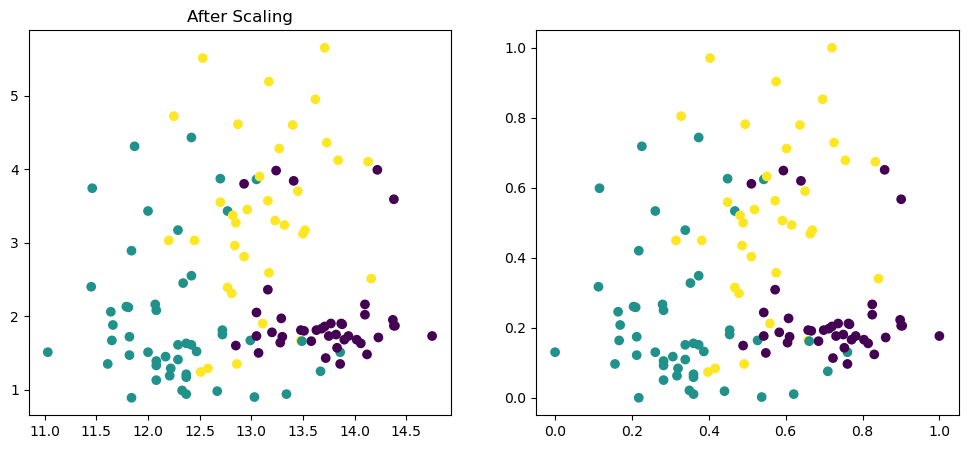

In [13]:
#by Scatter graph
fig , (ax1,ax2) = plt.subplots(ncols=2 , figsize=(12,5))
#before scalling

ax1.scatter(X_train['Alcohol'], X_train['Malic Acid'],c=y_train)
ax1.set_title('Before Scaling')
#after scalling
ax2.scatter(X_train_scaled['Alcohol'], X_train_scaled['Malic Acid'],c=y_train)
ax1.set_title('After Scaling')
plt.show()

<AxesSubplot: title={'center': 'After Scaling'}, xlabel='Alcohol', ylabel='Density'>

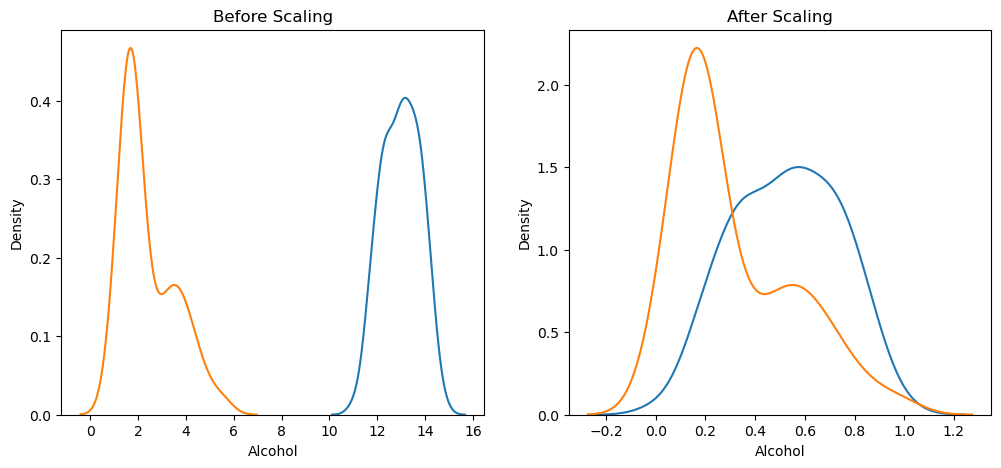

In [14]:
#by kdplot
fig , (ax1,ax2) = plt.subplots(ncols=2 , figsize=(12,5))
#before scalling
ax1.set_title('Before Scaling')
sns.kdeplot(X_train['Alcohol'], ax=ax1)
sns.kdeplot(X_train['Malic Acid'], ax=ax1)
#after scalling
ax2.set_title('After Scaling')
sns.kdeplot(X_train_scaled['Alcohol'], ax=ax2)
sns.kdeplot(X_train_scaled['Malic Acid'], ax=ax2)

# Max Abs Scaling

In [19]:
from sklearn.preprocessing import MaxAbsScaler
scalar=MaxAbsScaler()
scalar.fit(X_train)
X_train_Max=scalar.transform(X_train)
X_test_Max=scalar.transform(X_test)

In [21]:
X_train_Max=pd.DataFrame(X_train_Max).rename(columns={0:'Alcohol', 1:'Malic Acid'})
X_test_Max=pd.DataFrame(X_test_Max).rename(columns={0:'Alcohol', 1:'Malic Acid'})

In [26]:
np.round(X_train_Max.describe() ,1)


,Alcohol,Malic Acid
count,124.0,124.0
mean,0.9,0.4
std,0.1,0.2
min,0.7,0.2
25%,0.8,0.3
50%,0.9,0.3
75%,0.9,0.6
max,1.0,1.0


In [28]:
np.round(X_test_Max.describe() ,1)

,Alcohol,Malic Acid
count,54.0,54.0
mean,0.9,0.4
std,0.1,0.2
min,0.8,0.1
25%,0.8,0.3
50%,0.9,0.3
75%,0.9,0.5
max,1.0,1.0


# Effects


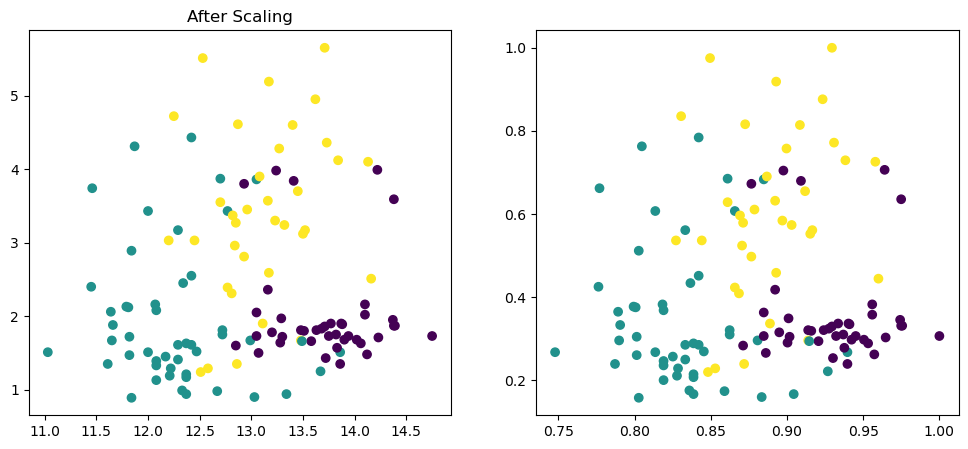

In [31]:
#by Scatter graph
fig , (ax1,ax2) = plt.subplots(ncols=2 , figsize=(12,5))
#before scalling

ax1.scatter(X_train['Alcohol'], X_train['Malic Acid'],c=y_train)
ax1.set_title('Before Scaling')
#after scalling
ax2.scatter(X_train_Max['Alcohol'], X_train_Max['Malic Acid'],c=y_train)
ax1.set_title('After Scaling')
plt.show()

<AxesSubplot: title={'center': 'After Scaling'}, xlabel='Alcohol', ylabel='Density'>

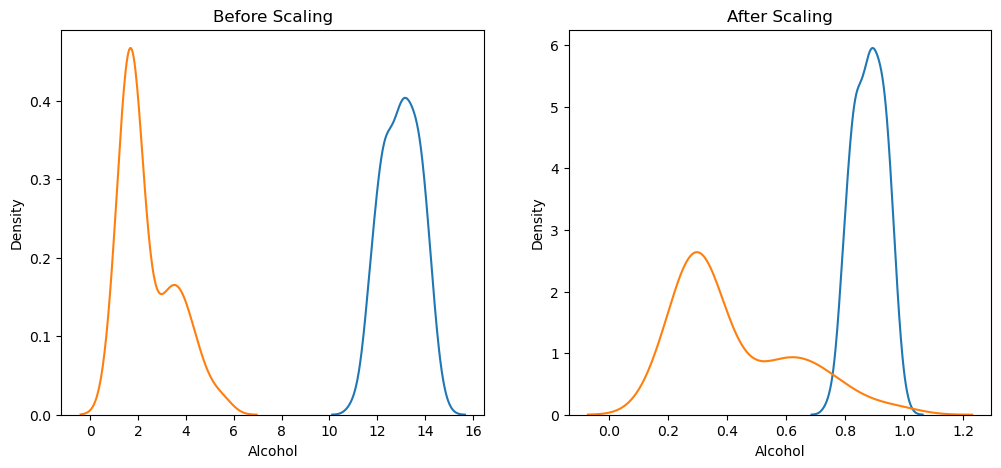

In [32]:
#by kdplot
fig , (ax1,ax2) = plt.subplots(ncols=2 , figsize=(12,5))
#before scalling
ax1.set_title('Before Scaling')
sns.kdeplot(X_train['Alcohol'], ax=ax1)
sns.kdeplot(X_train['Malic Acid'], ax=ax1)
#after scalling
ax2.set_title('After Scaling')
sns.kdeplot(X_train_Max['Alcohol'], ax=ax2)
sns.kdeplot(X_train_Max['Malic Acid'], ax=ax2)